In [14]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
import pandas as pd
import fbprophet
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
df1=pd.read_csv("data_13_16.csv")

In [17]:
df1.tail()

,date,date.1,unit_sales,onpromotion,weekday,type,year
72339,31-12-2016,31-12-2016,66,True,5,1.0,2016
72340,31-12-2016,31-12-2016,46,True,5,1.0,2016
72341,31-12-2016,31-12-2016,35,False,5,1.0,2016
72342,31-12-2016,31-12-2016,88,False,5,1.0,2016
72343,31-12-2016,31-12-2016,15,False,5,1.0,2016


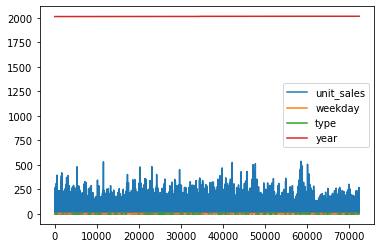

In [18]:
df1.plot()

In [19]:
df1.columns = ['date','ds','y','onpromotion','weekday','type','year']
df1.head()

,date,ds,y,onpromotion,weekday,type,year
0,01-01-2013,01-01-2013,2,NaN,1,1.0,2013
1,02-01-2013,02-01-2013,19,NaN,2,NaN,2013
2,02-01-2013,02-01-2013,45,NaN,2,NaN,2013
3,02-01-2013,02-01-2013,69,NaN,2,NaN,2013
4,02-01-2013,02-01-2013,54,NaN,2,NaN,2013


In [20]:
df1['onpromotion'] = df1['onpromotion'].fillna(0)
df1.tail()

,date,ds,y,onpromotion,weekday,type,year
72339,31-12-2016,31-12-2016,66,True,5,1.0,2016
72340,31-12-2016,31-12-2016,46,True,5,1.0,2016
72341,31-12-2016,31-12-2016,35,False,5,1.0,2016
72342,31-12-2016,31-12-2016,88,False,5,1.0,2016
72343,31-12-2016,31-12-2016,15,False,5,1.0,2016


In [21]:
df1["onpromotion"] = df1["onpromotion"].astype(int)
df1.tail()

,date,ds,y,onpromotion,weekday,type,year
72339,31-12-2016,31-12-2016,66,1,5,1.0,2016
72340,31-12-2016,31-12-2016,46,1,5,1.0,2016
72341,31-12-2016,31-12-2016,35,0,5,1.0,2016
72342,31-12-2016,31-12-2016,88,0,5,1.0,2016
72343,31-12-2016,31-12-2016,15,0,5,1.0,2016


In [22]:
df1["ds"]= pd.to_datetime(df1["ds"])

In [31]:
from fbprophet import Prophet
from fbprophet.plot import plot

In [32]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_col

In [33]:
# Initialize the Model
model=Prophet()

In [34]:
df1.dropna(axis=0,inplace=True)

In [35]:
model.fit(df1)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [36]:
model.component_modes

{'additive': ['yearly',
  'weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [37]:
### Create future dates of 365 days
future_dates=model.make_future_dataframe(periods=365)

In [38]:
prediction=model.predict(future_dates)

In [39]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,46.898167,-8.264926,100.979778,46.898167,46.898167,0.816742,0.816742,0.816742,-4.179172,-4.179172,-4.179172,4.995914,4.995914,4.995914,0.0,0.0,0.0,47.714909
1,2013-01-04,46.886964,-17.143214,102.728653,46.886964,46.886964,-3.121114,-3.121114,-3.121114,-9.264982,-9.264982,-9.264982,6.143868,6.143868,6.143868,0.0,0.0,0.0,43.765850
2,2013-01-05,46.883229,3.046754,116.467141,46.883229,46.883229,14.512667,14.512667,14.512667,7.983172,7.983172,7.983172,6.529495,6.529495,6.529495,0.0,0.0,0.0,61.395896
3,2013-02-03,46.774927,13.722785,129.177295,46.774927,46.774927,27.670790,27.670790,27.670790,21.031076,21.031076,21.031076,6.639713,6.639713,6.639713,0.0,0.0,0.0,74.445716
4,2013-02-11,46.745050,-16.616668,98.864180,46.745050,46.745050,-6.554079,-6.554079,-6.554079,-1.225509,-1.225509,-1.225509,-5.328570,-5.328570,-5.328570,0.0,0.0,0.0,40.190972


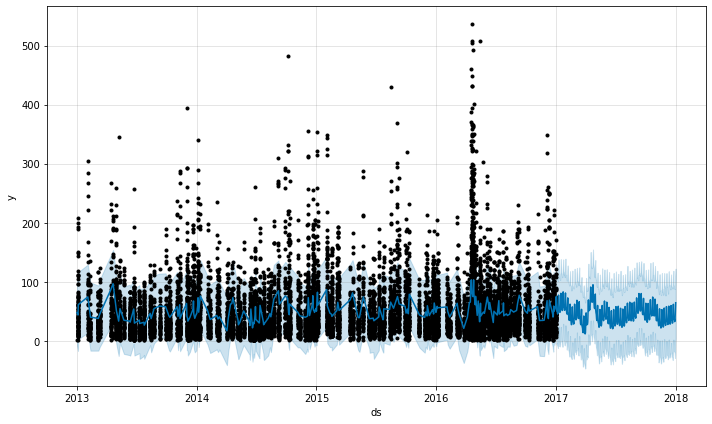

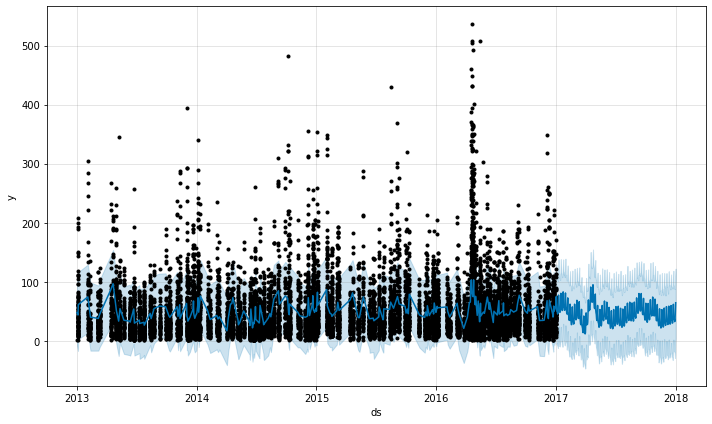

In [40]:
### plot the predicted projection
model.plot(prediction)

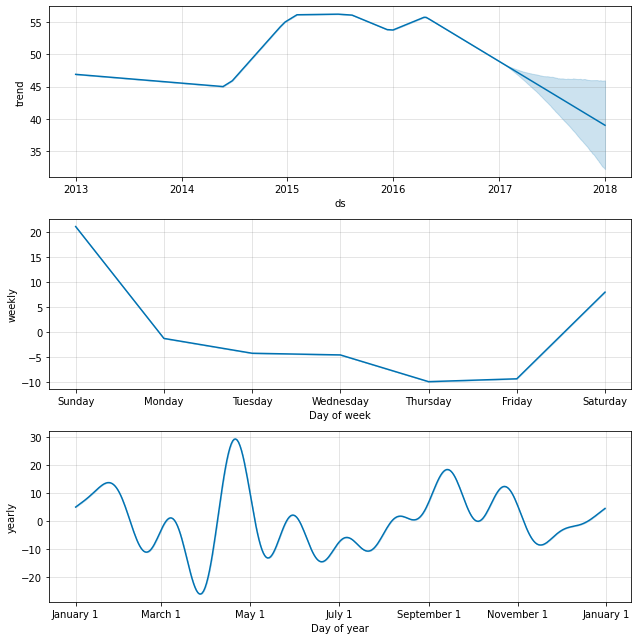

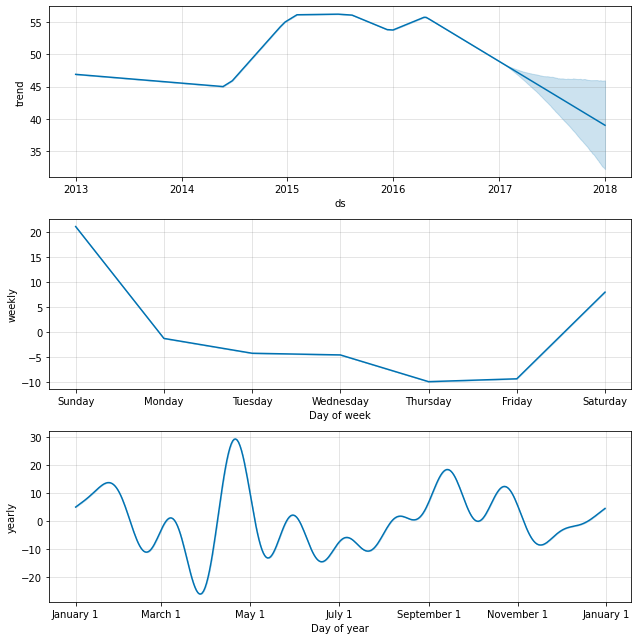

In [41]:
#### Visualize Each Components[Trends,yearly]
model.plot_components(prediction)

In [42]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='0 days', period='180 days', horizon = '365 days')
df_cv.tail()

INFO:fbprophet:Making 7 forecasts with cutoffs between 2013-01-16 00:00:00 and 2016-01-01 00:00:00


  0%|          | 0/7 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
21747,2016-12-31,54.072865,1.054089,103.342095,20,2016-01-01
21748,2016-12-31,54.072865,0.262972,106.923075,14,2016-01-01
21749,2016-12-31,54.072865,-0.637285,108.060780,39,2016-01-01
21750,2016-12-31,54.072865,-0.549845,107.271863,29,2016-01-01
21751,2016-12-31,54.072865,0.000112,106.285454,15,2016-01-01


In [43]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,57 days,1905.097108,43.647418,30.175048,1.148553,0.548118,0.849581
1,59 days,2018.247190,44.924906,30.735845,1.188495,0.560882,0.845766
2,60 days,2073.788022,45.538863,31.298539,1.187487,0.562959,0.839788
3,62 days,2255.642348,47.493603,32.214919,1.186954,0.572934,0.832259
4,64 days,2265.145775,47.593548,32.401943,1.199947,0.563371,0.834983


/usr/local/lib/python3.8/dist-packages/fbprophet/plot.py:526: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.8/dist-packages/fbprophet/plot.py:527: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


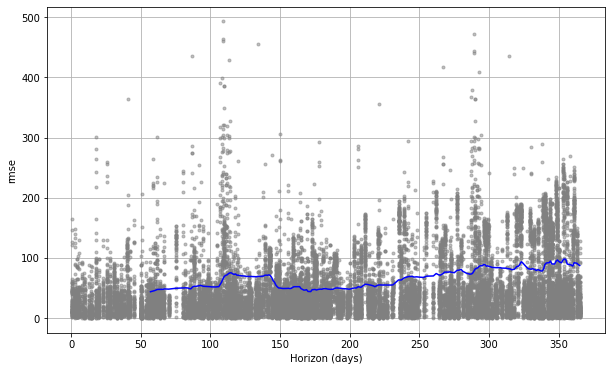

In [44]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')

In [45]:
df_p.dtypes

horizon     timedelta64[ns]
mse                 float64
rmse                float64
mae                 float64
mape                float64
mdape               float64
coverage            float64
dtype: object

In [47]:
rmse_main = df_p["mae"].mean()
rmse_main

47.483603711069165